# Moon trajectory modelisation with Kepler laws in the heliocentric reference frame

## Kepler laws

**First law :** A planet in the solar system has an elliptical orbit, where the sun occupies one of its focus point.

**Second law:** In equal amounts of time, a planet scans the same area relative to the sun.

**Third law :** For any orbiting object on an elliptical trajectory :

$$
\frac{T^2}{a^3}=\frac{4\pi^2}{G(M+m)}
$$

where $T$ is the revolution period in seconds, $a$ the semi-major axis, $G$ the universal constant of gravitation, $m$ the orbiting object mass, and $M$ the central body mass.

## Ellipse definition

An ellipse is defined as the set of points where the sum of the distance to the 2 focus points in equal to a constant $2a$. Some special values are :

- $a \in \mathbb{R_+^*}$ : the semi-major axis, the distance between the center and the farthest point,
- $b \in \mathbb{R_+^*}$ : the semi-minor axis, the distance between the center and the nearest point,
- $c \in \mathbb{R_+}$ : the distance between the center and one of the focus point *(if $c=0$, the shape is a circle)*.

Some different equation of an ellipse, if the semi-major axis is parallel to the $x$-axis, are :

$$
\left(\frac{x-x_C}{a}\right)^2 + \left(\frac{y-y_C}{b}\right)^2 = 1
$$
$$
\begin{cases}
x = x_C + a\cos{(t)} \\
y = y_C + b\sin{(t)}
\end{cases}
$$

where $(x_C;y_C)$ are the ellipse center coordinates, and $t \in [0;2\pi[$ the angle formed by a point on the ellipse, the center, and the semi-major axis.

### Calculating the distance $r$ between a point $M$ on the ellipse and a focus point $F$

> Demonstration needed

$$
r(\theta) = \frac{b^2}{a - c \cos{(\pi - \theta)}}
$$

with $\theta \in [0;2\pi[$ representing the angle between a point on the ellipse, a focus point, and the semi-amjor axis.

## Data

|                     | Sun         | Earth       | Moon        |
| ------------------- | ----------- | ----------- | ----------- |
| Semi-major axis $a$ | *N/A*       | 1.496e11 m  | 3.844e8 m   |
| Perihelion $SP$     | *N/A*       | 1.471e11 m  | 3.626e8 m   |
| Aphelion $SA$       | *N/A*       | 1.521e11 m  | 4.054e8 m   |
| Mass $m$            | 1.989e30 kg | 5.972e24 kg | 7.346e22 kg |

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse, Circle
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
# Constants and data

M_S = 1.989e30

a_E = 1.496e11
P_E = 1.471e11
A_E = 1.521e11
M_E = 5.972e24

a_M = 3.844e8
P_M = 3.626e8
A_M = 4.054e8
M_M = 7.346e22

G = 6.67e-11

## Calculating semi-minor axis $b$

Let :
- $C$ the ellipse center,
- $F$ and $F'$ the 2 focus points,
- $A$ the point on the ellipse so that $CA=a$,
- $B$ the point on the ellipse so that $CB=b$.

So we have :

$$
BF+BF' = 2BF = 2a
$$

Plus, with BCF being a right triangle in C, according to the Pythagorean theorem :

$$
BC^2+CF^2 = BF^2
$$

So :

$$
\begin{align}
&                 &     2a &= 2BF \\
& \Leftrightarrow &      a &= BF \\
& \Rightarrow     &    a^2 &= BF^2 = BC^2+CF^2 = b^2+CF^2 \\
& \Leftrightarrow &    b^2 &= a^2 - CF^2 \\
& \Rightarrow     &      b &= \sqrt{a^2-CF^2}
\end{align}
$$

> In our context, $CF = a - SP$, where $SP$ is the perihelion. So we can rewrite the previous equation as :
> $$
     b = \sqrt{a^2 - (a-SP)^2} = \sqrt{a^2 - a^2 + 2aSP - SP^2} = \sqrt{2aSP - SP^2}
$$

In [3]:
def b(a, P):
    return math.sqrt(2 * a * P - P**2)

b_E = b(a_E, P_E)
b_M = b(a_M, P_M)

print("b_E = {:.3e}".format(b_E))
print("b_M = {:.3e}".format(b_M))

b_E = 1.496e+11
b_M = 3.838e+08


## Calculating periods for Earth and the Moon

According to the third Kepler law :

$$
\frac{T^2}{a^3}=\frac{4\pi^2}{G(M+m)}
\Leftrightarrow
T^2=\frac{4\pi^2a^3}{G(M+m)}
$$

So :

$$
T=\sqrt{\frac{4\pi^2a^3}{G(M+m)}}
$$

In [4]:
def T(a, m, M):
    return math.sqrt((4 * math.pi**2 * a**3)/(G * (M + m)))

T_E = T(a_E, M_E, M_S)
T_M = T(a_M, M_M, M_E)

print("T_E = {:.3e}".format(T_E))
print("T_M = {:.3e}".format(T_M))

T_E = 3.156e+07
T_M = 2.358e+06


## Drawing trajectories

In [15]:
%matplotlib inline
plt.close()

fig, ax = plt.subplots()
ax.set(xlim=(-1.6e11, 1.6e11), ylim=(-1.6e11, 1.6e11), aspect="equal")

# Sun
sun = Circle((0, 0), 0.1e11, facecolor="yellow")
ax.add_artist(sun)

# Earth
E_trajectory = Ellipse((P_E-a_E, 0), 2*a_E, 2*b_E, edgecolor="blue", facecolor="none")
ax.add_artist(E_trajectory)

earth = Circle((P_E, 0), 0.05e11, facecolor="blue")
ax.add_artist(earth)

angle = np.radians(np.arange(0, 360, 3))
x = P_E-a_E + a_E*np.cos(angle)
y = b_E * np.sin(angle)

def animate(frame):
    earth.center = (x[frame], y[frame])
    return (earth)

plt.close()

anim = FuncAnimation(fig, animate, frames=len(x), interval=50)
HTML(anim.to_html5_video())

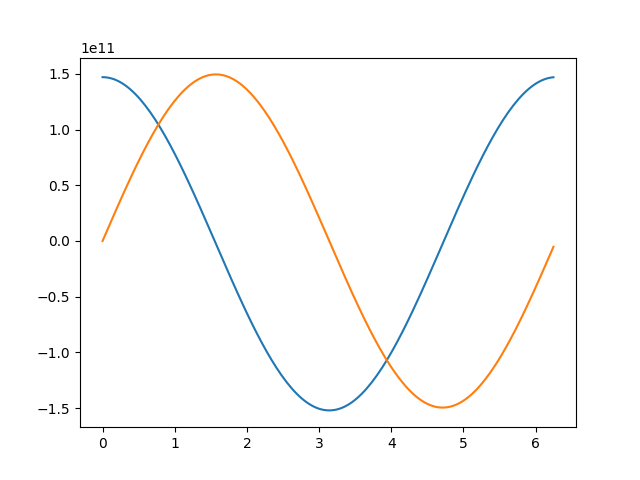

In [9]:
%matplotlib ipympl

fig, ax = plt.subplots()

ax.plot(angle, x)
ax.plot(angle, y)

plt.show()